In [ ]:
from datetime import datetime
import requests
import pandas as pd

In [5]:
url = 'https://api.open-meteo.com/v1/forecast?latitude=42.442949&longitude=-76.485158&hourly=temperature_2m,wind_speed_10m,dew_point_2m,apparent_temperature,precipitation'
response = requests.get(url)
weather_data = response.json()

In [6]:
df = pd.DataFrame(weather_data['hourly'])
df['time'] = pd.to_datetime(df['time'])

In [8]:
# Get current time in UTC (since the data is in UTC)
current_time = pd.Timestamp.now().tz_localize('UTC')

# Find the closest time in the dataframe
df['time'] = df['time'].dt.tz_localize('UTC')
closest_time_idx = abs(df['time'] - current_time).idxmin()
current_weather = df.iloc[closest_time_idx]

print(f"Weather data for time closest to now ({current_time}):")
print(current_weather)

Weather data for time closest to now (2025-03-18 13:45:49.837929+00:00):
time                    2025-03-18 14:00:00+00:00
temperature_2m                                1.1
wind_speed_10m                                4.5
dew_point_2m                                 -2.5
apparent_temperature                         -2.0
precipitation                                 0.0
Name: 14, dtype: object


In [9]:
data = requests.get('https://historical-forecast-api.open-meteo.com/v1/forecast?latitude=42.442949&longitude=-76.485158&start_date=2025-02-17&end_date=2025-03-17&daily=temperature_2m_max,temperature_2m_min,sunrise,apparent_temperature_min,daylight_duration,sunset,uv_index_max,rain_sum,precipitation_sum,snowfall_sum,wind_speed_10m_max&timezone=America%2FNew_York&wind_speed_unit=mph&temperature_unit=fahrenheit&precipitation_unit=inch')
historic_data = pd.DataFrame(data.json()['daily'])
historic_data['sunrise'] = pd.to_datetime(historic_data['sunrise'])
historic_data['sunset'] = pd.to_datetime(historic_data['sunset'])
historic_data['time'] = pd.to_datetime(historic_data['time'])

Text(0.5, 1.0, 'Temperature and Precipitation Over Time')

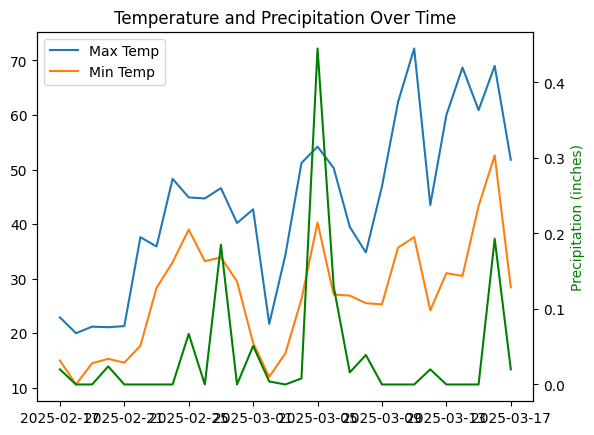

In [13]:
import matplotlib.pyplot as plt
plt.plot(historic_data['time'], historic_data['temperature_2m_max'], label='Max Temp')
plt.plot(historic_data['time'], historic_data['temperature_2m_min'], label='Min Temp')
# plt.plot(historic_data['time'], historic_data['precipitation_sum'], label='Precip')
plt.legend()
ax2 = plt.gca().twinx()
ax2.plot(historic_data['time'], historic_data['precipitation_sum'], 'g-', label='Precipitation')
ax2.set_ylabel('Precipitation (inches)', color='g')
plt.title('Temperature and Precipitation Over Time')